<a href="https://colab.research.google.com/github/gm965/Machine-learning/blob/master/Vending_result_output.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Energy estimation from Vending data**

In [126]:
#importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io

#Library for importing files in local drive in colab notebook
from google.colab import files

# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

#Using Box-cox and Quantile transform for data transformation
import sklearn
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [128]:
#Import Monthly vending kWh and Actual kWh reading data
uploaded = files.upload()

Saving Bhilwara Low uncertainty outcome.csv to Bhilwara Low uncertainty outcome (2).csv


In [129]:
df = pd.read_csv(io.BytesIO(uploaded['Bhilwara Low uncertainty outcome.csv']))
df.columns = ["AC_No","Vend_kWh","kWh_read"]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

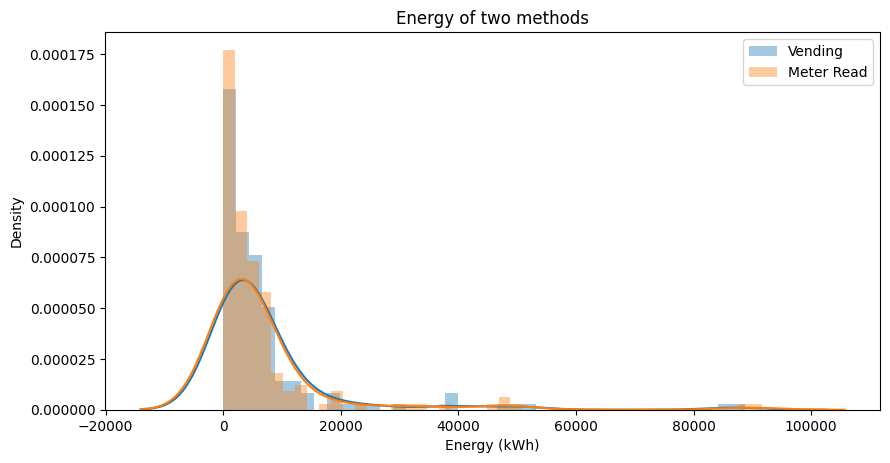

In [136]:
#Plotting distribution of energies using "Meter reading" and "Vending info"
plt.figure(figsize=(10,5), dpi=100)
sns.distplot(df['Vend_kWh'], kde=True, label='Vending')
sns.distplot(df['kWh_read'], kde=True, label='Meter Read')

# Plot formatting
plt.legend(prop={'size': 10})
plt.title('Energy of two methods')
plt.xlabel('Energy (kWh)')
plt.ylabel('Density')
plt.savefig('name.png')
files.download('name.png')
plt.show()

In [147]:
# Approach for plotting histogram of individual columns
def histograms_plot(df, features, rows, cols):
  fig=plt.figure(figsize=(12,8), dpi = 100)
  for i, feature in enumerate(features):
    ax=fig.add_subplot(rows,cols,i+1)
    df[feature].hist(bins=20,ax=ax,facecolor='blue',alpha=0.7, grid=False)
    ax.set_title(feature+" distribution",color='black')
    ax.set_xlabel("Energy (kWh)")
    ax.set_ylabel("Frequency")
  fig.tight_layout()
  plt.show()

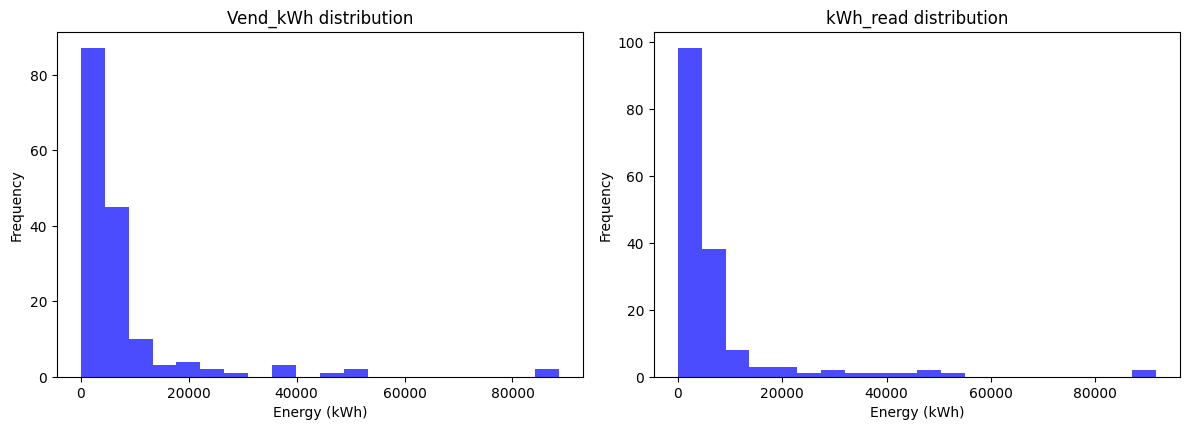

In [148]:
df_modf = df[["Vend_kWh","kWh_read"]]
col_plots = 2
row_plots = (df_modf.shape[1]//col_plots)+1
histograms_plot(df_modf,df_modf.columns,row_plots,col_plots)

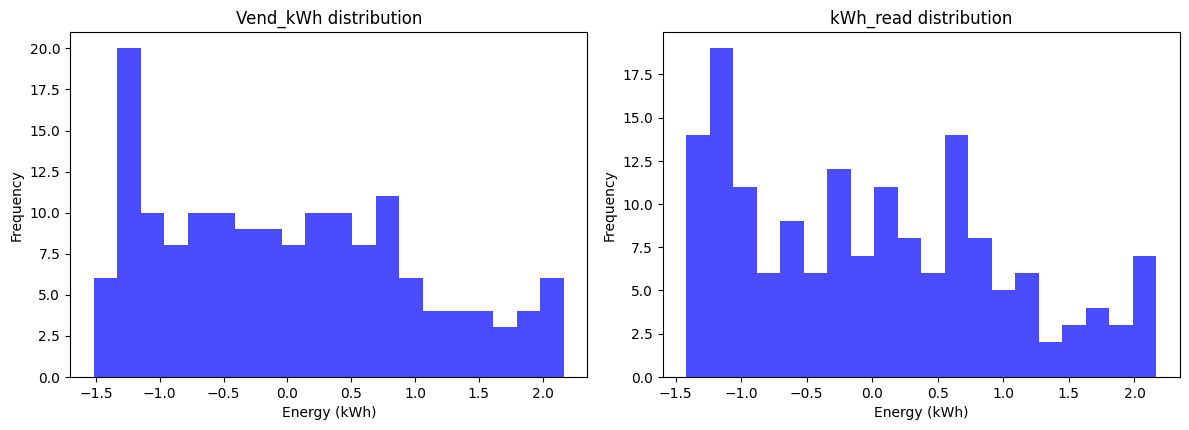

In [149]:
# perform a yeo-johnson transform of the dataset after performing StandardScaling
scaler = StandardScaler()
power = PowerTransformer(method='yeo-johnson')
pipeline = Pipeline(steps=[('s', scaler),('p', power)])
data_yjs = pipeline.fit_transform(df_modf)
df_yjs = pd.DataFrame(data_yjs,columns=df_modf.columns)
histograms_plot(df_yjs,df_yjs.columns,row_plots,col_plots)

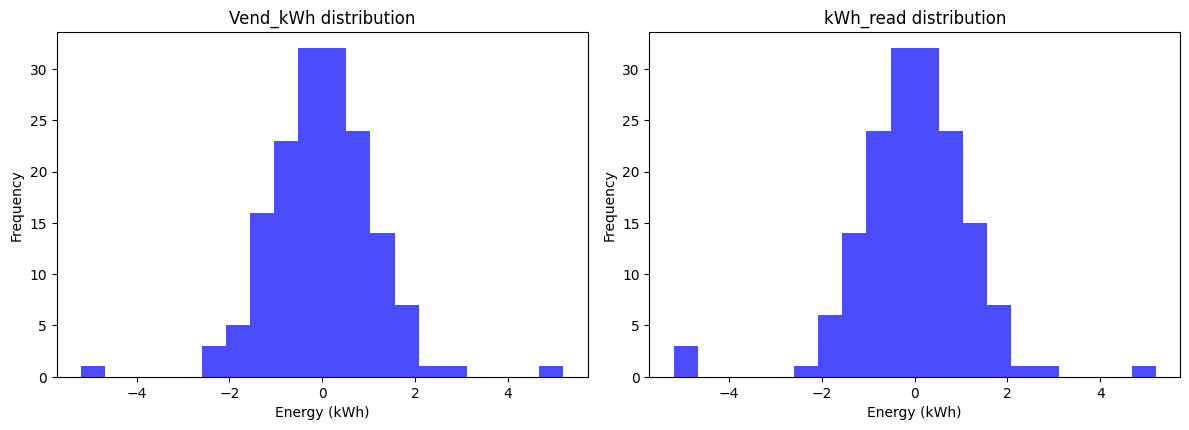

In [150]:
#Quantile transformer
transformer = QuantileTransformer(n_quantiles=100, output_distribution='normal')
X_qt= transformer.fit_transform(df_modf)
df_qt = pd.DataFrame(X_qt,columns=df_modf.columns)
histograms_plot(df_qt,df_qt.columns,row_plots,col_plots)

In [151]:
# #Discrete Transformer
# from sklearn.preprocessing import KBinsDiscretizer 
# dt = KBinsDiscretizer(n_bins=50, encode='ordinal', strategy='uniform')
# df_modf.dropna(inplace=True)
# X_dt = dt.fit_transform(df_modf)
# df_dt = pd.DataFrame(X_dt,columns=df_modf.columns)
# histograms_plot(df_dt,df_dt.columns,row_plots,col_plots)

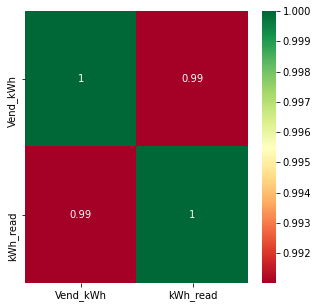

In [152]:
#Correlation between different features
corr = df_modf.corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr, annot=True,cmap='RdYlGn') #cmap='Greens' )
plt.show()

##Importing Monthly vending and billing data

In [153]:
from google.colab import files
uploaded = files.upload()

Saving Monthly vend and billed unit comparison.csv to Monthly vend and billed unit comparison (3).csv


In [154]:
df_monthly = pd.read_csv(io.BytesIO(uploaded['Monthly vend and billed unit comparison.csv']))
df_monthly.columns = ["AC_No","Month", "Billed_kWh", "Vend_kWh", "Month_no", "Year"]
df_monthly.head()

In [156]:
#Approach for plotting histogram of "kWh from Vending" and "kWh Meter Reading" on a monthly basis
def histograms_monthly_plot(df, features, rows, cols):
  fig=plt.figure(figsize=(15,8), dpi = 100)
  for i in range(1,13):
    df_intended = df[df["Month_no"]==i]
    #transformer = QuantileTransformer(n_quantiles=100, output_distribution='normal')
    #X_qt= transformer.fit_transform(df_modf)
    #df_qt = pd.DataFrame(X_qt,columns=df_modf.columns)
    ax=fig.add_subplot(rows,cols,i)
    
    sns.distplot(df_intended['Vend_kWh'],  kde=True, label='Vending')

    sns.distplot(df_intended['Billed_kWh'],  kde=True,label='Meter Read')
    #df_intended[feature].hist(bins=20,ax=ax,facecolor='blue',alpha=0.7)
    ax.set_title("Month - "+str(i)+" distribution",color='black')
    plt.legend(prop={'size': 6})

  fig.tight_layout()
  plt.show()

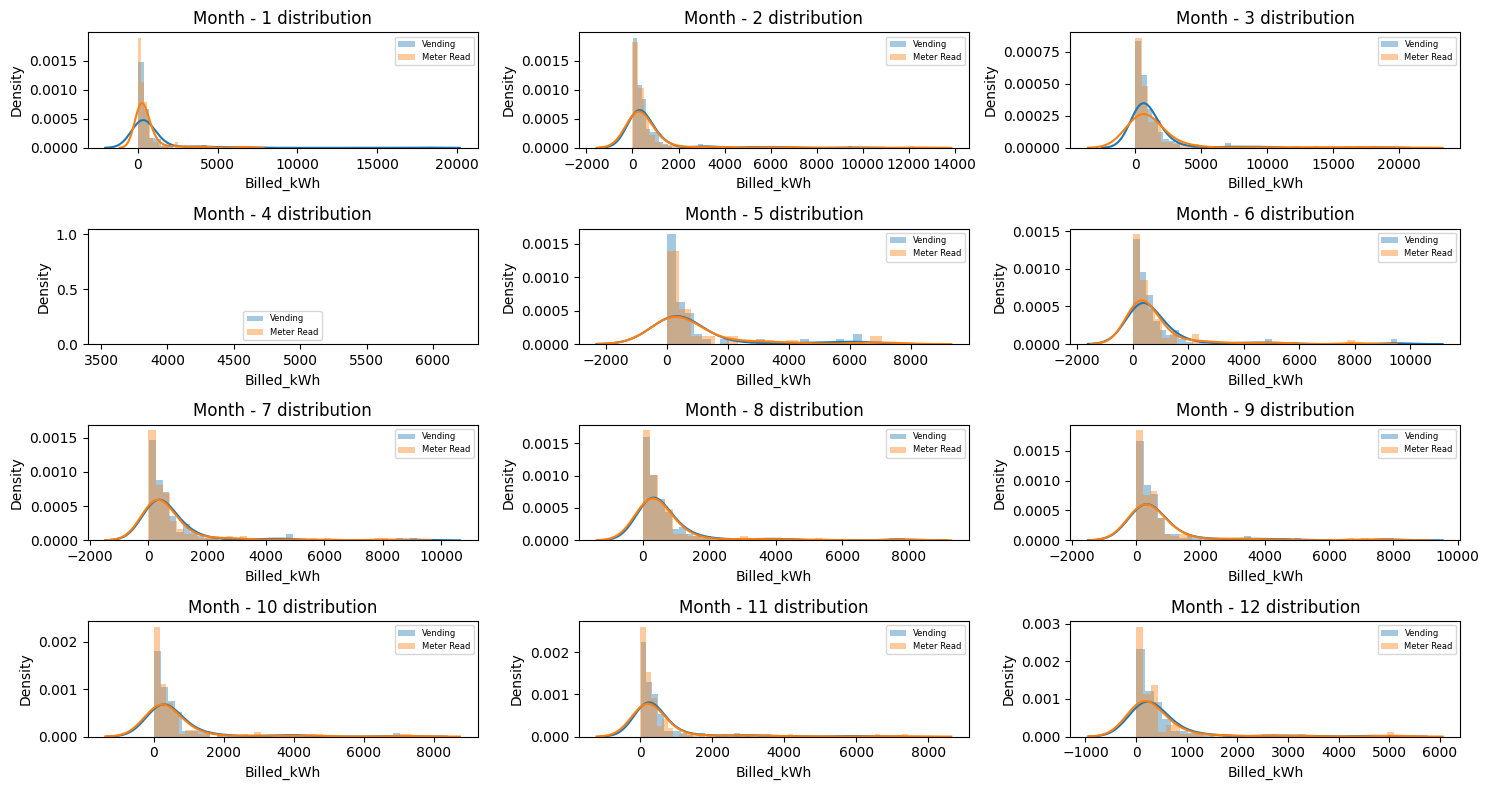

In [157]:
#Monthly result
df_modf1 = df_monthly[["Vend_kWh","Billed_kWh","Month_no"]]
col_plots = 3
row_plots = 4
histograms_monthly_plot(df_modf1,df_modf1.columns,row_plots,col_plots)

In [159]:
#Method 2 (Functional approach for plotting histogram of individual columns)
def histograms_monthly_plot_transformed(df, features, rows, cols):
  fig=plt.figure(figsize=(15,8), dpi = 100)
  for i in range(1,13):
    df_intended = df[df["Month_no"]==i]
    transformer = QuantileTransformer(n_quantiles=100, output_distribution='normal')
    X_qt= transformer.fit_transform(df_intended)
    df_qt = pd.DataFrame(X_qt,columns=df_intended.columns)
    ax=fig.add_subplot(rows,cols,i)
    
    sns.distplot(df_qt['Vend_kWh'],  kde=True, label='Vending')

    sns.distplot(df_qt['Billed_kWh'],  kde=True,label='Meter Read')
    #df_intended[feature].hist(bins=20,ax=ax,facecolor='blue',alpha=0.7)
    ax.set_title("Month - "+str(i)+" distribution",color='black')
    plt.legend(prop={'size': 6})

  fig.tight_layout()
  plt.show()

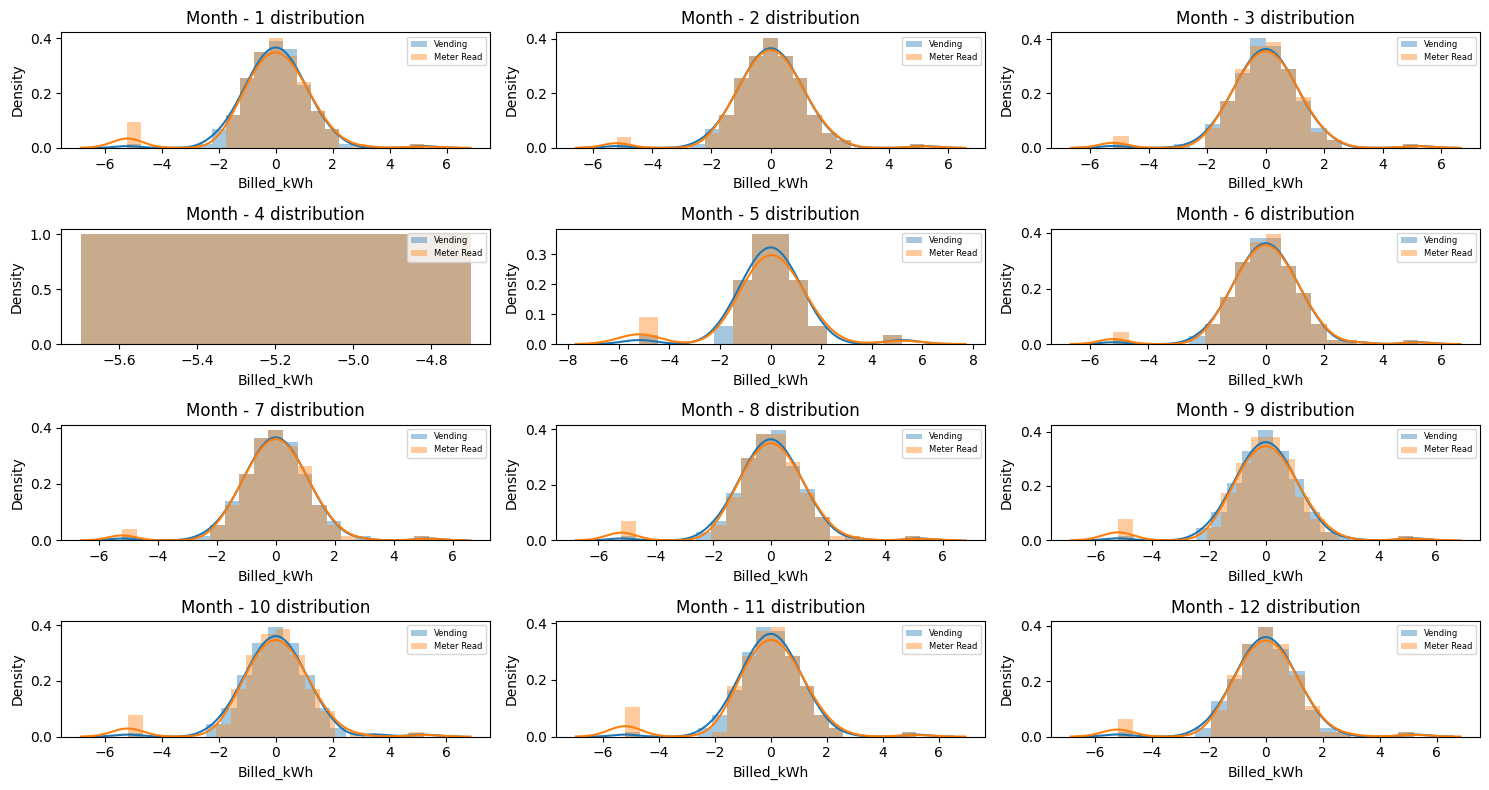

In [158]:
#Histogram of monthly data after data transformation
histograms_monthly_plot_transformed(df_modf1,df_modf1.columns,row_plots,col_plots)

**Monthly summary**

In [163]:
#Monthly summary (Vending kWh, Meter reading or Billed kWh and Percentage difference between these two)
df_monthly = df_modf1.groupby(["Month_no"]).sum().reset_index()
df_monthly = df_monthly.assign(Percentage=lambda x: (x['Billed_kWh'] - x['Vend_kWh'])*100 / x['Billed_kWh'])

#Cumulative over the period
cum_df = df_monthly[["Vend_kWh","Billed_kWh"]].cumsum()
# Computing Cumulative Percentage
#Method 1
#cum_df['cum_percent'] = 100*(df_monthly.Billed_kWh.cumsum() - df_monthly.Vend_kWh.cumsum()) / df_monthly.Billed_kWh.cumsum()
#Method 2
cum_df = cum_df.assign(Percentage=lambda x: (x['Billed_kWh'] - x['Vend_kWh'])*100 / x['Billed_kWh'])
cum_df.columns = ["Vend_kWh_cumulative","Billed_kWh_cumulative","Percentage_cumulative"]

results = pd.concat([df_monthly,cum_df], axis = 1)
final_res = results[results["Month_no"]==12]["Percentage_cumulative"]
results

,Month_no,Vend_kWh,Billed_kWh,Percentage,Vend_kWh_cumulative,Billed_kWh_cumulative,Percentage_cumulative
0,1,125233.79,90610.00,-38.211886,125233.79,90610.00,-38.211886
1,2,104456.12,96734.00,-7.982840,229689.91,187344.00,-22.603291
2,3,175536.36,209444.00,16.189358,405226.27,396788.00,-2.126644
3,4,3532.35,6203.00,43.054167,408758.62,402991.00,-1.431203
4,5,41094.68,40655.00,-1.081491,449853.30,443646.00,-1.399156
5,6,116706.01,110265.00,-5.841391,566559.31,553911.00,-2.283455
6,7,115708.12,113793.00,-1.682986,682267.43,667704.00,-2.181121
7,8,97159.69,93819.00,-3.560782,779427.12,761523.00,-2.351094
8,9,93849.55,89996.00,-4.281913,873276.67,851519.00,-2.555160
9,10,85589.73,79613.00,-7.507229,958866.40,931132.00,-2.978568


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

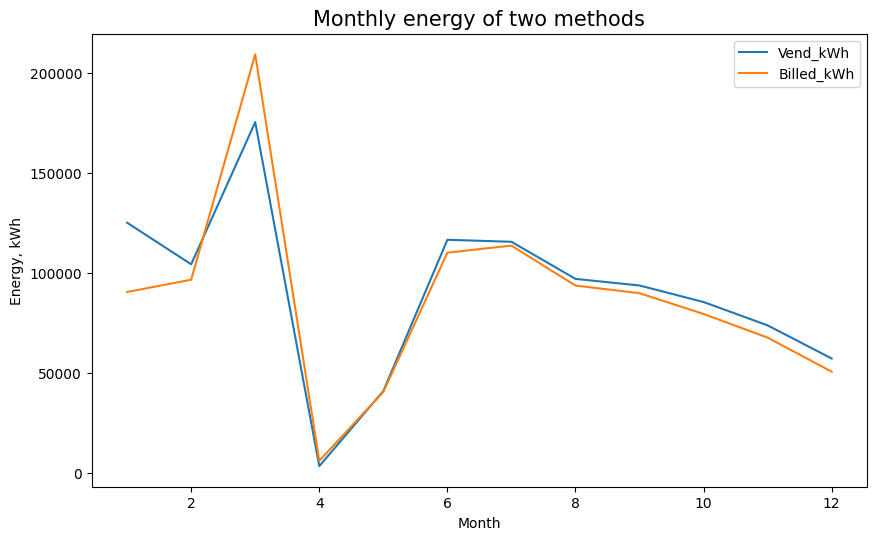

In [197]:
#Monthly energy of two methods
line,ax = plt.subplots(figsize=(10,6), dpi = 100)
#plt.figure(figsize=(10,5), dpi=100)
ax = sns.lineplot(x="Month_no", y="Vend_kWh", data=results, ax=ax,legend='auto')
ax = sns.lineplot(x="Month_no", y="Billed_kWh", data=results, ax=ax, legend='auto')
ax.set_title("Monthly energy of two methods", fontsize=15)
ax.legend(['Vend_kWh', 'Billed_kWh'],loc="best", prop={'size': 10})
ax.set_xlabel("Month")
ax.set_ylabel("Energy, kWh")
line.savefig('Vending_billing_energy_comparison.png')
files.download('Vending_billing_energy_comparison.png')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

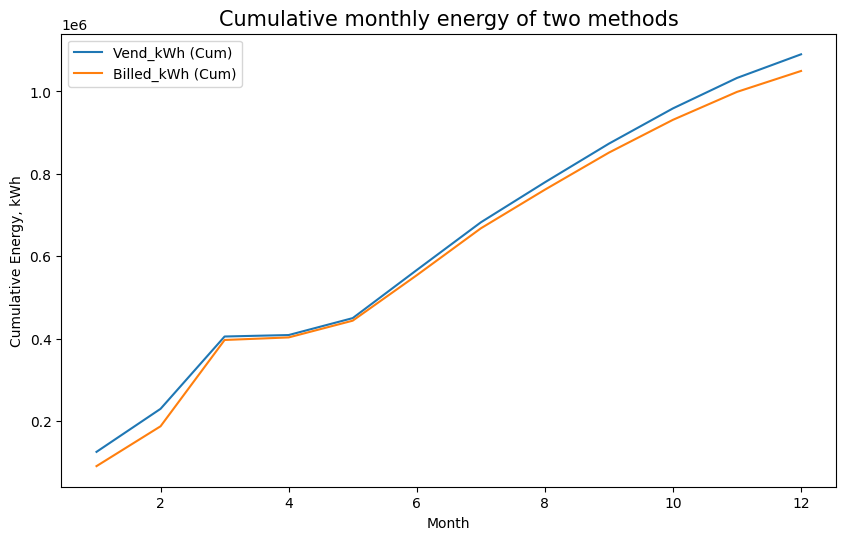

In [196]:
#Cumulative monthly energy of two methods
line,ax = plt.subplots(figsize=(10,6), dpi = 100)
#plt.figure(figsize=(10,5), dpi=100)
ax = sns.lineplot(x="Month_no", y="Vend_kWh_cumulative", data=results, ax=ax,legend='auto')
ax = sns.lineplot(x="Month_no", y="Billed_kWh_cumulative", data=results, ax=ax, legend='auto')
ax.set_title("Cumulative monthly energy of two methods", fontsize=15)
ax.legend(['Vend_kWh (Cum)', 'Billed_kWh (Cum)'],loc="best", prop={'size': 10})
ax.set_xlabel("Month")
ax.set_ylabel("Cumulative Energy, kWh")
line.savefig('Cumulative_Vending_billing_energy_comparison.png')
files.download('Cumulative_Vending_billing_energy_comparison.png')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

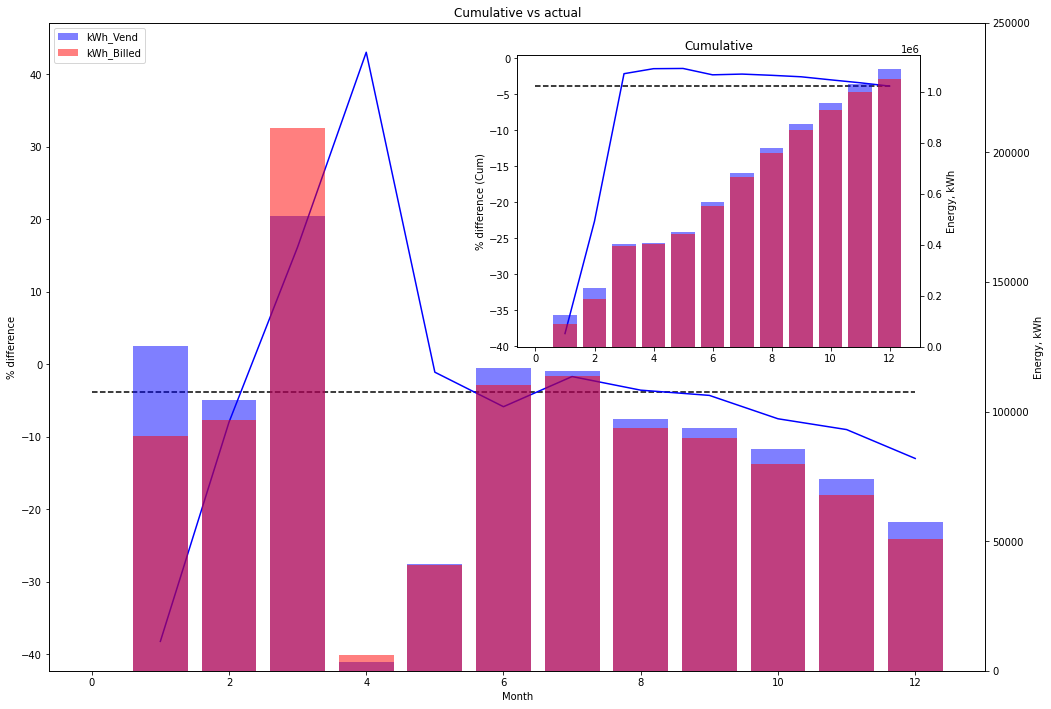

In [195]:
#Comparison of monthly and cumulative figure
fig = plt.figure(figsize=(13,9))

ax1 = fig.add_axes([0,0,1,1])
ax2 = fig.add_axes([0.5,0.5,0.43,0.45])

ax1.set_title("Cumulative vs actual")

ax1.plot(results["Month_no"], results["Percentage"], color = 'blue', label="% Loss")
ax3 = ax1.twinx()
ax3.bar(results["Month_no"], results["Vend_kWh"], color = 'b', alpha = 0.5, label="kWh_Vend")
ax3.set_ylim(top=250000)
ax3.set_ylabel("Energy, kWh")
ax3.bar(results["Month_no"], results["Billed_kWh"], color = 'r', alpha = 0.5, label="kWh_Billed")
ax1.hlines(final_res, xmin=0, xmax = 12, linestyle='--')
ax1.set_xlabel("Month")
ax1.set_ylabel("% difference")
ax3.legend(loc="upper left")



ax2.set_title("Cumulative")
ax2.plot(results["Month_no"], results["Percentage_cumulative"], color = 'blue', label="% Cum Loss")
ax4 = ax2.twinx()
ax4.bar(results["Month_no"], results["Vend_kWh_cumulative"], color = 'b', alpha = 0.5, label="kWh_Vend")
#ax4.set_ylim(top=250000)
ax4.set_ylabel("Energy, kWh")
ax4.bar(results["Month_no"], results["Billed_kWh_cumulative"], color = 'r', alpha = 0.5, label="kWh_Billed")

ax2.hlines(final_res, xmin=0, xmax = 12, linestyle='--')
ax2.set_ylabel("% difference (Cum)")

plt.savefig('Monthly_Vending_billing_energy_comparison.png')
files.download('Monthly_Vending_billing_energy_comparison.png')

plt.show()


###Monthly distribution

In [189]:
df_melted = df_modf1.melt("Month_no",var_name="Vend_Billed",value_name="Energy")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

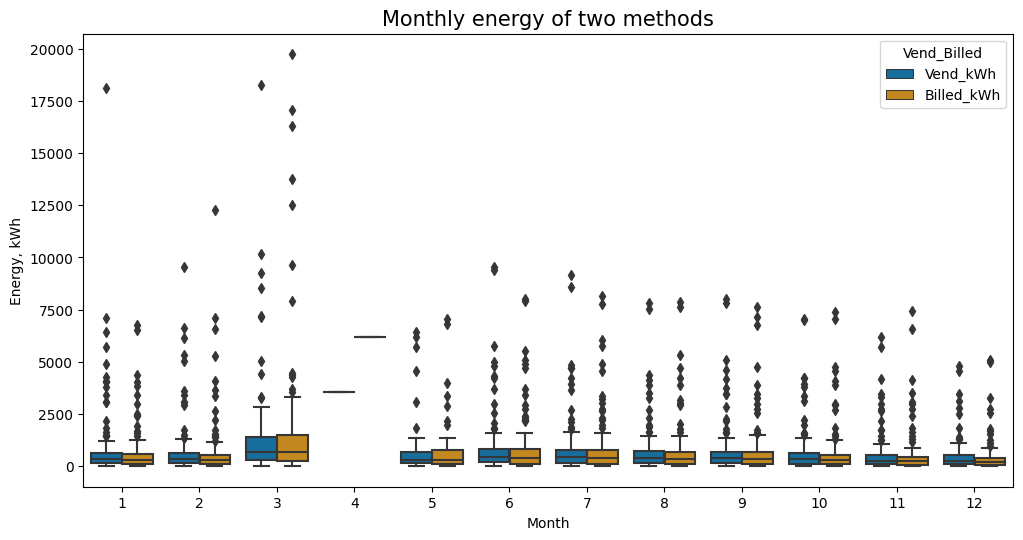

In [193]:
#Monthly energy of two methods
line,ax = plt.subplots(figsize=(12,6), dpi = 100)
sns.boxplot(y='Energy', x='Month_no', data=df_melted, palette="colorblind", hue='Vend_Billed')
ax.set_title("Monthly energy of two methods", fontsize=15)
ax.set_xlabel("Month")
ax.set_ylabel("Energy, kWh")
line.savefig('Monthly_Vending_billing_energy_distribution_comparison.png')
files.download('Monthly_Vending_billing_energy_distribution_comparison.png')
plt.show()